In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
kicks = pd.read_csv('C:/Users/kickstarter.csv')

In [21]:
kicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [22]:
kicks[kicks['name'].isnull()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97
309991,648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00
338931,796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00


In [23]:
# remove project no name
kicks = kicks[kicks['name'].notnull()]

#only takes data from 2009
kicks = kicks[kicks['launched'] >= '2009-04-28 00:00:00']

#  Drop column usd pledged because of wrong data
del kicks['usd pledged']

# replace wrong data in country from N,0" -> Others
# kicks['country'] = kicks['country'].replace('N,0"', 'Others')
kicks['country'].replace('N,0"', 'Others', inplace=True)

In [24]:
# Add new columns year and month for deadline and launch
kicks['deadline_y'] = pd.to_datetime(kicks['deadline']).dt.year
kicks['deadline_m'] = pd.to_datetime(kicks['deadline']).dt.month
kicks['deadline_q'] = pd.to_datetime(kicks['deadline']).dt.quarter
kicks['launched_y'] = pd.to_datetime(kicks['launched']).dt.year
kicks['launched_m'] = pd.to_datetime(kicks['launched']).dt.month
kicks['launched_q'] = pd.to_datetime(kicks['launched']).dt.quarter

In [25]:
# Add column duration of each project
kicks['duration'] = round((pd.to_datetime(kicks['deadline']).dt.date - pd.to_datetime(kicks['launched']).dt.date) / np.timedelta64(1, 'D'))

kicks['success'] = (kicks['state']=='successful').apply(int)

In [26]:
kicks

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,usd_pledged_real,usd_goal_real,deadline_y,deadline_m,deadline_q,launched_y,launched_m,launched_q,duration,success
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,...,0.00,1533.95,2015,10,4,2015,8,3,59.0,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,...,2421.00,30000.00,2017,11,4,2017,9,3,60.0,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,...,220.00,45000.00,2013,2,1,2013,1,1,45.0,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,...,1.00,5000.00,2012,4,2,2012,3,1,30.0,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,...,1283.00,19500.00,2015,8,3,2015,7,3,56.0,0
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,...,52375.00,50000.00,2016,4,2,2016,2,1,35.0,1
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,...,1205.00,1000.00,2014,12,4,2014,12,4,20.0,1
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,...,453.00,25000.00,2016,3,1,2016,2,1,45.0,0
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,...,8233.00,125000.00,2014,5,2,2014,4,2,35.0,0
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,...,6240.57,65000.00,2014,8,3,2014,7,3,30.0,0


Text(0.5, 1.0, "The state's ratios of all projects in the dataset")

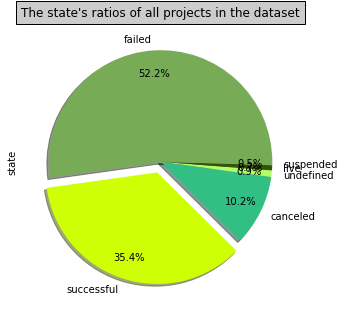

In [98]:
fig = plt.figure(figsize=[5, 10])
colors = ["asparagus", "neon yellow", "greenish teal", "pale lime green", "navy green"]
explodeTuple = (0.0, 0.1, 0.0, 0.0, 0.0, 0.0)
kicks['state'].value_counts().plot(kind="pie", colors=sns.xkcd_palette(colors), autopct='%1.1f%%',pctdistance=0.8, explode=explodeTuple,shadow=True)
plt.title("The state's ratios of all projects in the dataset",bbox={'facecolor':'0.8', 'pad':5})


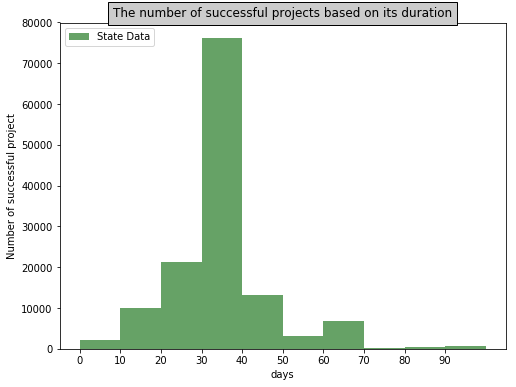

In [115]:
#how the duration will affect the successful rate of the projects
successfulrate = kicks[kicks['state'] == 'successful']
successfulrate['duration'].value_counts()

data_duration = successfulrate['duration']
fig = plt.figure(figsize=(8,6))
duration_range = np.arange(0,110,10)
plt.hist(data_duration, duration_range, label="State Data", color='darkgreen', alpha=0.6)
plt.xlabel('days')
plt.ylabel('Number of successful project')

plt.xticks(np.arange(0,100,10))
plt.legend(loc='upper left')
plt.title('The number of successful projects based on its duration',bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [29]:
kicks_binary = kicks.copy()
kicks_binary_sf = kicks_binary[kicks_binary['state'].isin(['successful','failed'])]
kicks_binary_sf['state'] = kicks_binary_sf['state'].apply(lambda x: 1 if x == 'successful' else 0)
sr_by_month = kicks_binary_sf.groupby('launched_m').sum()['state'] / kicks_binary_sf.groupby('launched_m').count()['state'] * 100
cat_list = kicks_binary_sf['main_category'].unique()

C:\Users\lanng\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


C:\Users\lanng\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


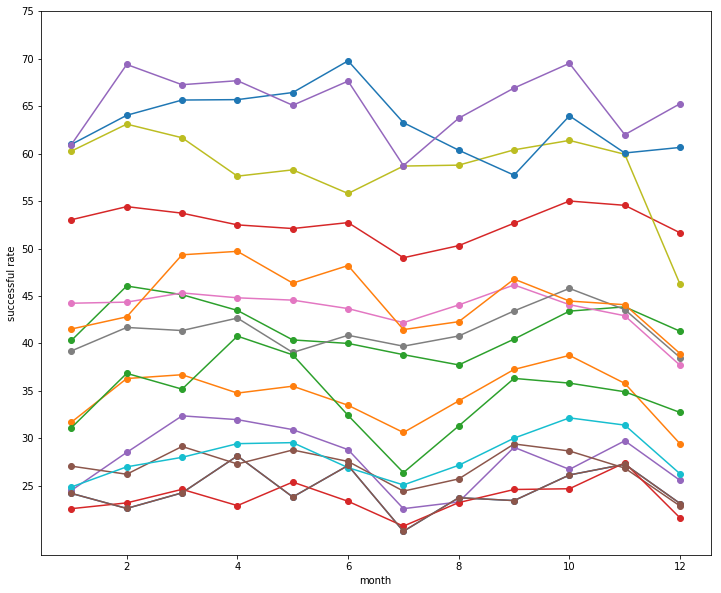

In [42]:
fig, ax = plt.subplots(figsize=(12,10))
ax = plt.plot(sr_by_month.sort_index().index,sr_by_month.sort_index().values,marker='o')

for cat in cat_list:
    kicks_binary_sf = kicks_binary[(kicks_binary['state'].isin(['successful','failed'])) & (kicks_binary['main_category'] == cat)]
    kicks_binary_sf['state'] = kicks_binary_sf['state'].apply(lambda x: 1 if x == 'successful' else 0)
    sr_by_month = kicks_binary_sf.groupby('launched_m').sum()['state'] / kicks_binary_sf.groupby('launched_m').count()['state'] * 100
    plt.plot(sr_by_month.sort_index().index,sr_by_month.sort_index().values,marker='o')

plt.yticks(np.arange(25,80,5))
plt.xlabel('month')
plt.ylabel('successful rate')
plt.show()

C:\Users\lanng\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<Figure size 1800x1080 with 0 Axes>

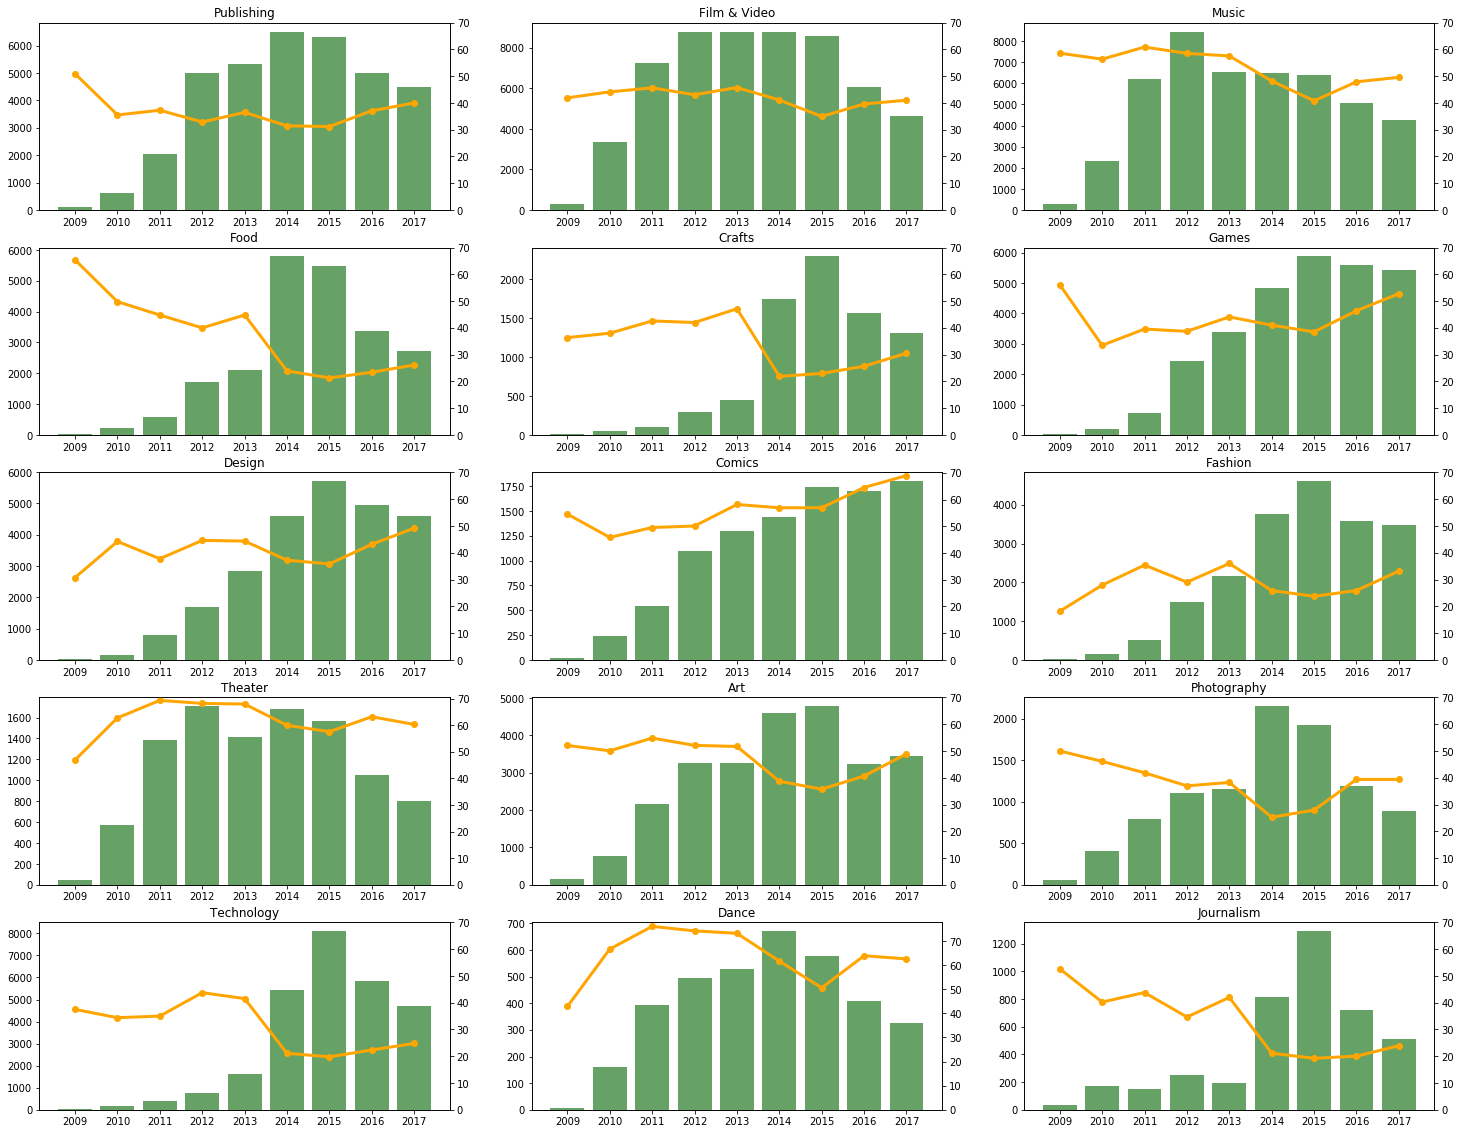

In [82]:
plt.figure(figsize = (25,15))
fig, axes = plt.subplots(5,3,figsize=(25,20))

cat_index = 0
for ax_row in axes:
    for ax_col1 in ax_row:
        kicks_binary_sf = kicks_binary[(kicks_binary['state'].isin(['successful','failed'])) & (kicks_binary['main_category'] == cat_list[cat_index])]
        kicks_binary_sf['state'] = kicks_binary_sf['state'].apply(lambda x: 1 if x == 'successful' else 0)
        sr_by_month = kicks_binary_sf.groupby('launched_y').sum()['state'] / kicks_binary_sf.groupby('launched_y').count()['state'] * 100
        
        count_by_month = kicks_binary_sf.groupby('launched_y').count()['state']
        ax_col1.bar(count_by_month.sort_index().index,count_by_month.sort_index().values, color='darkgreen', alpha=0.6)
     
        ax_col1.set_title(cat_list[cat_index])
        ax_col1.set_xticks([i for i in range(2009,2018)])      
        
        ax_col2 = ax_col1.twinx()
        ax_col2.plot(sr_by_month.sort_index().index,sr_by_month.sort_index().values,color='orange',linewidth=3,marker='o')
        ax_col2.set_yticks(np.arange(0,80,10))
        
        cat_index += 1
        
plt.show()

,goal,pledged,backers,duration,success
goal,1.000000,0.007358,0.004012,0.023064,-0.024333
pledged,0.007358,1.000000,0.717079,0.006563,0.111534
backers,0.004012,0.717079,1.000000,-0.001551,0.129108
duration,0.023064,0.006563,-0.001551,1.000000,-0.118390
success,-0.024333,0.111534,0.129108,-0.118390,1.000000


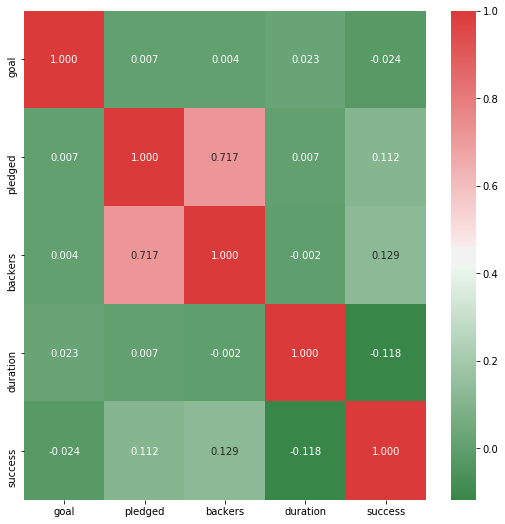

In [63]:
plt.figure(figsize=(9,9))
sns.heatmap(kicks[['goal','pledged','backers','duration','success']].corr(), annot=True, fmt='.3f', cmap=sns.diverging_palette(133, 12, as_cmap=True))
kicks[['goal','pledged','backers','duration','success']].corr()

In [25]:
kicks.groupby('country').sum()[['backers','usd_pledged_real','usd_goal_real']]

,backers,usd_pledged_real,usd_goal_real
country,,,
AT,65239,9.665789e+06,2.665748e+07
AU,642816,4.673713e+07,4.555105e+08
BE,33502,4.181558e+06,2.302780e+07
CA,1302563,9.179336e+07,6.552910e+08
CH,67162,1.305512e+07,2.064435e+08
DE,410147,3.977627e+07,3.136943e+08
DK,77071,7.583262e+06,3.960204e+07
ES,164227,1.294765e+07,1.196695e+08
FR,350214,3.435751e+07,2.381982e+08


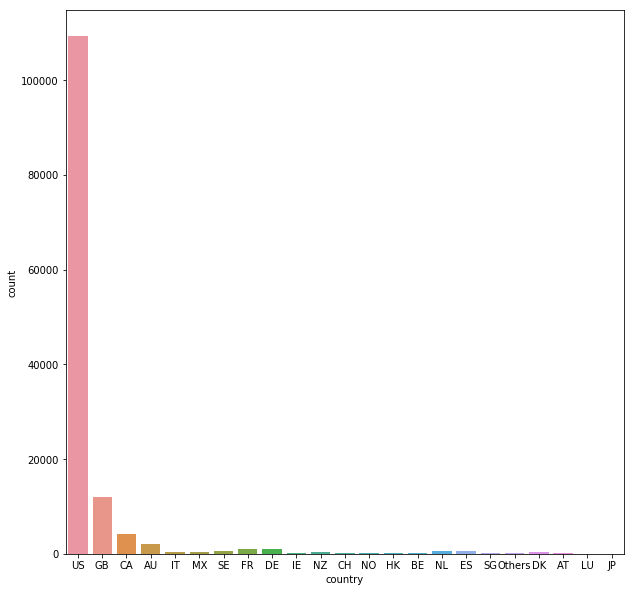

US        109297
GB         12067
CA          4134
AU          2010
DE           937
FR           908
NL           617
SE           509
ES           492
NZ           448
IT           439
MX           396
DK           360
HK           216
IE           207
CH           187
SG           178
NO           162
BE           152
AT           107
Others       105
LU            19
JP             7
Name: country, dtype: int64

In [26]:
#Which country has more successful project?
plt.figure(figsize=(10,10))
sns.countplot(x='country', data=kicks[kicks['state']=='successful')
kicks[kicks['state']=='successful']['country'].value_counts()
plt.show()

kicks[kicks['state']=='successful']['country'].value_counts()

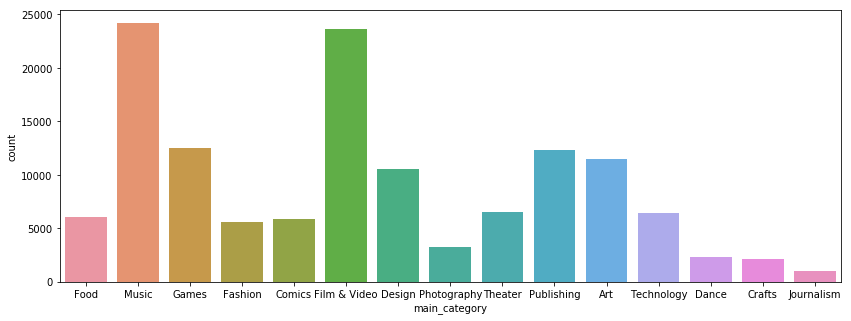

Music           24197
Film & Video    23623
Games           12518
Publishing      12300
Art             11509
Design          10550
Theater          6534
Technology       6433
Food             6085
Comics           5842
Fashion          5593
Photography      3305
Dance            2338
Crafts           2115
Journalism       1012
Name: main_category, dtype: int64

In [36]:
#Which category has more number of successful projects?
plt.figure(figsize=(14,5))
sns.countplot(x='main_category', data=kicks[kicks['state']=='successful'])
kicks[kicks['state']=='successful']['main_category'].value_counts()
plt.show()

kicks[kicks['state']=='successful']['main_category'].value_counts()

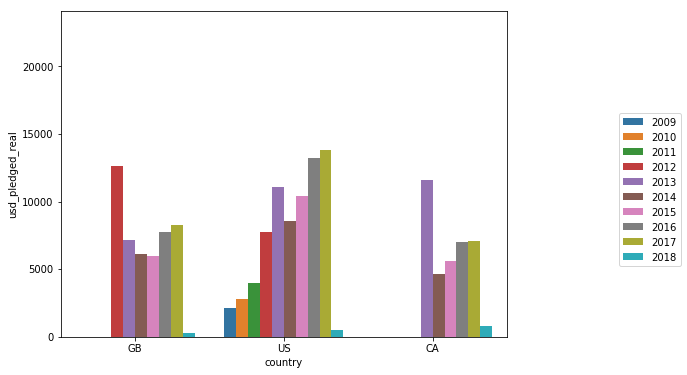

In [53]:
#Analyze top 3 countries have more successful projects
plt.figure(figsize=(8,6))
top_3_countries = kicks[kicks['state']=='successful']['country'].value_counts().head(3).index
top_3_countries
top_3_data = kicks[kicks['country'].isin(top_3_countries)]
sns.barplot(data=top_3_data, x='country', y='usd_pledged_real', hue='launched_y', errwidth=0, )
plt.legend(bbox_to_anchor =(1.2,0.5,0.2,0.2))
plt.show()

C:\Users\lanng\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


<Figure size 1800x1080 with 0 Axes>

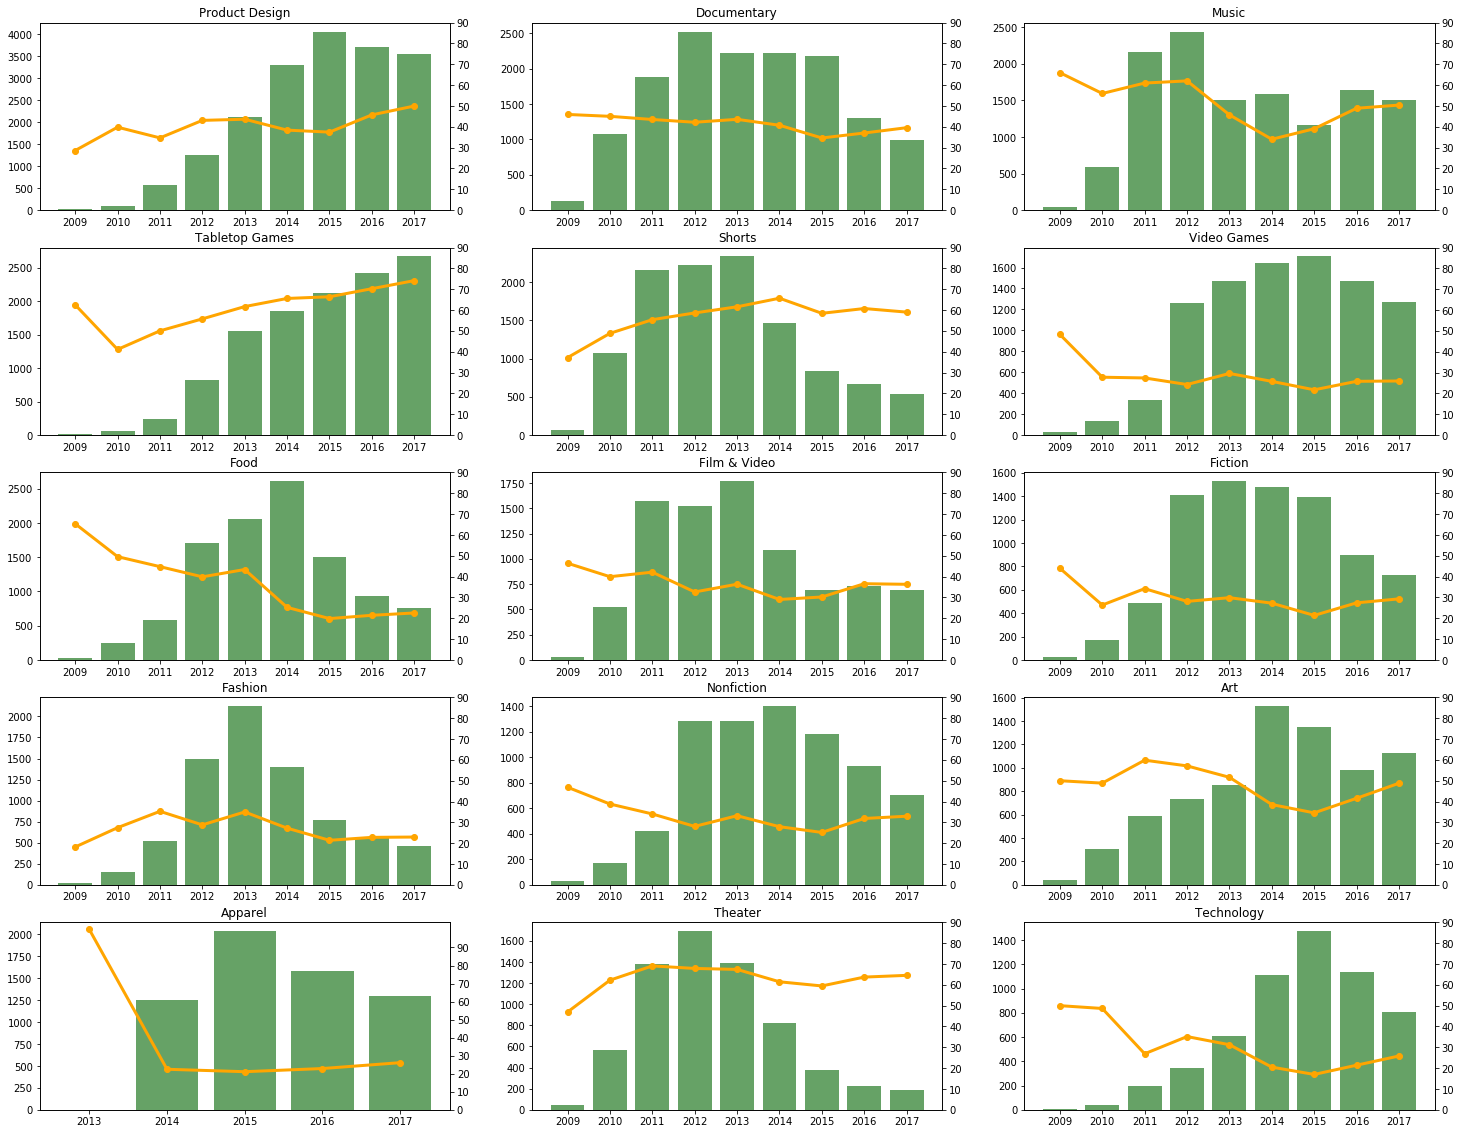

In [81]:
#Analyze the successful rate of each category
sub_cat_list = kicks['category'].value_counts().head(20).index

plt.figure(figsize = (25,15))
fig, axes = plt.subplots(5,3,figsize=(25,20))

cat_index = 0
for ax_row in axes:
    for ax_col1 in ax_row:
        kicks_binary_sf = kicks_binary[(kicks_binary['state'].isin(['successful','failed'])) & (kicks_binary['category'] == sub_cat_list[cat_index])]
        kicks_binary_sf['state'] = kicks_binary_sf['state'].apply(lambda x: 1 if x == 'successful' else 0)
        sr_by_month = kicks_binary_sf.groupby('launched_y').sum()['state'] / kicks_binary_sf.groupby('launched_y').count()['state'] * 100
        
        count_by_month = kicks_binary_sf.groupby('launched_y').count()['state']
        ax_col1.bar(count_by_month.sort_index().index,count_by_month.sort_index().values,color='darkgreen', alpha=0.6)
     
        ax_col1.set_title(sub_cat_list[cat_index])
        ax_col1.set_xticks([i for i in range(2009,2018)])      
        
        ax_col2 = ax_col1.twinx()
        ax_col2.plot(sr_by_month.sort_index().index,sr_by_month.sort_index().values,color='orange',linewidth=3,marker='o')
        ax_col2.set_yticks(np.arange(0,100,10))
        
        cat_index += 1
        
plt.show()

C:\Users\lanng\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


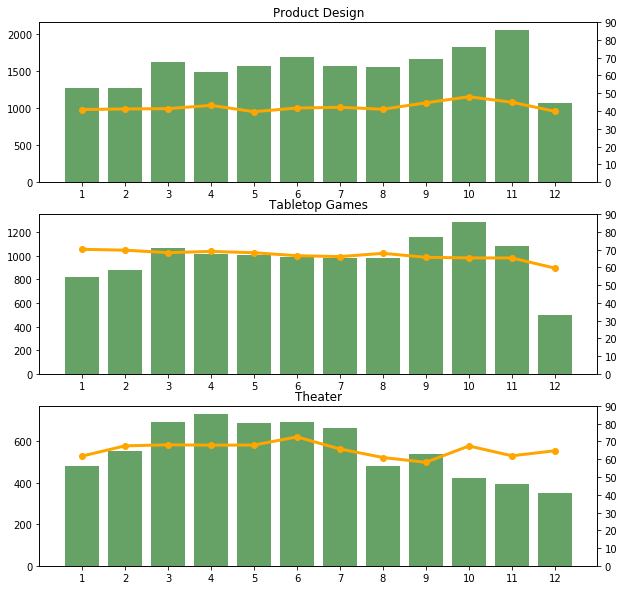

In [80]:
cat_chosen = ['Product Design','Tabletop Games','Theater']

fig, axes = plt.subplots(3,1,figsize=(10,10))

cat_index = 0
for ax_col1 in axes:

    kicks_binary_sf = kicks_binary[(kicks_binary['state'].isin(['successful','failed'])) & (kicks_binary['category'] == cat_chosen[cat_index])]
    kicks_binary_sf['state'] = kicks_binary_sf['state'].apply(lambda x: 1 if x == 'successful' else 0)
    sr_by_month = kicks_binary_sf.groupby('launched_m').sum()['state'] / kicks_binary_sf.groupby('launched_m').count()['state'] * 100

    count_by_month = kicks_binary_sf.groupby('launched_m').count()['state']
    ax_col1.bar(count_by_month.sort_index().index,count_by_month.sort_index().values,color='darkgreen', alpha=0.6)

    ax_col1.set_title(cat_chosen[cat_index])
    ax_col1.set_xticks([i for i in range(1,13)])      

    ax_col2 = ax_col1.twinx()
    ax_col2.plot(sr_by_month.sort_index().index,sr_by_month.sort_index().values,color='orange',linewidth=3,marker='o')
    ax_col2.set_yticks(np.arange(0,100,10))

    cat_index += 1
        
plt.show()